# Style transfer Methods, A review

### A Neural Algorithm of Artistic Style
Source: https://harishnarayanan.org/writing/artistic-style-transfer/

Using VGG16 (or 19) and a gramm matrix to solve an optimization problem

In [96]:
# Imports
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

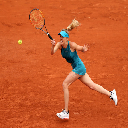

In [97]:
image_size = 128
images_path = "C:/Users/Acer/Documents/GitHub/style_transfer_2018"
# Load a content image
content_image = Image.open(images_path+"/content_images/07.jpg").resize((image_size, image_size))
style_image = Image.open(images_path+"/style_images/02.jpg").resize((image_size, image_size))
content_image.resize((128,128)) # Resize just to see it at a smaller size

In [99]:
# Transforming into numeric information
content_array = np.asarray(content_image, dtype='float32')
content_array = np.expand_dims(content_array, axis=0)
style_array = np.asarray(style_image, dtype='float32')
style_array = np.expand_dims(style_array, axis=0)

red_mean = 103.939
green_mean = 116.779
blue_mean = 123.68

content_array[:,:,:,0] -= red_mean
content_array[:,:,:,1] -= green_mean
content_array[:,:,:,2] -= blue_mean
content_array = content_array[:,:,:,::-1]
style_array[:,:,:,0] -= red_mean
style_array[:,:,:,1] -= green_mean
style_array[:,:,:,2] -= blue_mean
style_array = style_array[:,:,:,::-1]

print(content_array.shape, style_array.shape)

(1, 128, 128, 3) (1, 128, 128, 3)


In [100]:
#Defining our loss functions
def content_loss(content, combination):
    return tf.reduce_sum(tf.square(content-combination))

def gram_matrix(x): # Hay que entenderla bien
    features = tf.keras.backend.batch_flatten(tf.keras.backend.permute_dimensions(x, (2, 0, 1)))
    gram = tf.matmul(features, tf.transpose(features))
    return gram

def style_loss(style, combination): # Tambien
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    return tf.reduce_sum(tf.square(S - C)) / (4. * (channels ** 2) * (image_size ** 4))

def total_variation_loss(x):
    a = tf.square(x[:, :image_size-1, :image_size-1, :] - x[:, 1:, :image_size-1, :])
    b = tf.square(x[:, :image_size-1, :image_size-1, :] - x[:, :image_size-1, 1:, :])
    return tf.reduce_sum(tf.pow(a + b, 1.25))

In [101]:
# Start creating the main graph
content_node = tf.constant(content_array, name = "content_image", dtype=tf.float32)
style_node = tf.constant(style_array, name = "style_image", dtype=tf.float32)
combination_image = tf.Variable(tf.random_uniform(shape=[1,image_size, image_size,3], minval = -1, maxval= 1), dtype=tf.float32)
input_ten = tf.concat([content_node, style_node, combination_image], axis = 0)

In [102]:



# Importing the VGG16 pre-trained net to use it on the content loss
vgg = tf.keras.applications.VGG16(include_top = False, weights = "imagenet", input_tensor = input_ten)

In [ ]:
final_image = final_image.reshape((image_size, image_size, 3))
final_image = final_image[:,:,::-1]
final_image[:,:,0] += red_mean
final_image[:,:,1] += green_mean
final_image[:,:,2] += blue_mean
final_image = np.clip(final_image, 0, 255).astype("uint8")
Image.fromarray(final_image)